In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
import seaborn as sns
from survAux import *
import pyroc
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.metrics import confusion_matrix
plt.style.use('seaborn-whitegrid')

import warnings
warnings.filterwarnings('ignore')

/tmp/ipykernel_2273010/1132296677.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


# plots from R

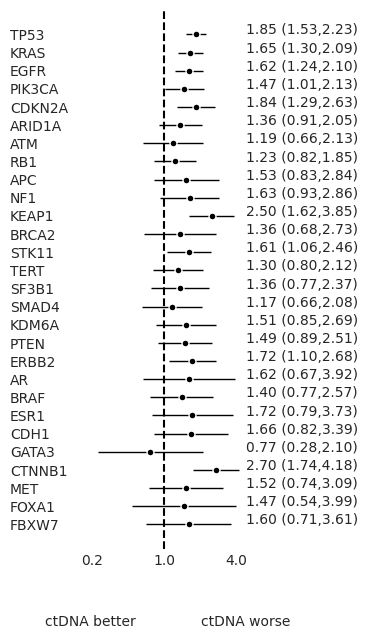

In [6]:
df = pd.read_csv('Routputs/geneStrat_ctDNA_CAT.csv',index_col=0)
HRs = pd.Series(list(zip(df['exp(coef)'], 
                         df['2.5%'], 
                         df['97.5%'])),
               index = df.index)
myForest(HRs,'ctDNA worse','ctDNA better','figures/forest_CAT_gene.pdf',(2,7))

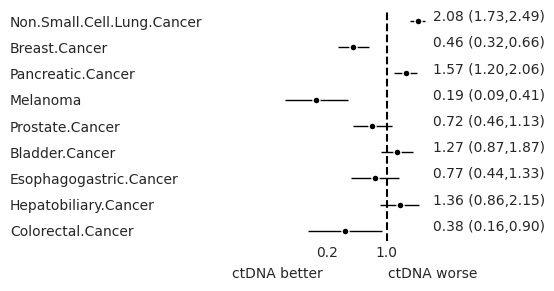

In [4]:
df = pd.read_csv('Routputs/cancerStrat_CAT.csv',index_col=0)
HRs = pd.Series(list(zip(df['exp(coef)'], 
                         df['2.5%'], 
                         df['97.5%'])),
               index = df.index)
myForest(HRs,'ctDNA worse','ctDNA better','figures/forest_CAT_cancertype.pdf',(2,3))

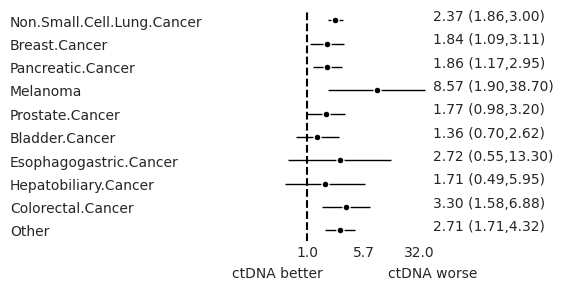

In [3]:
df = pd.read_csv('Routputs/cancerStrat_cfDNA_CAT.csv',index_col=0)
HRs = pd.Series(list(zip(df['exp(coef)'], 
                         df['2.5%'], 
                         df['97.5%'])),
               index = df.index)
myForest(HRs,'cfDNA worse','cfDNA better','figures/forest_CAT_cancertype_cfDNA.pdf',(2,3))

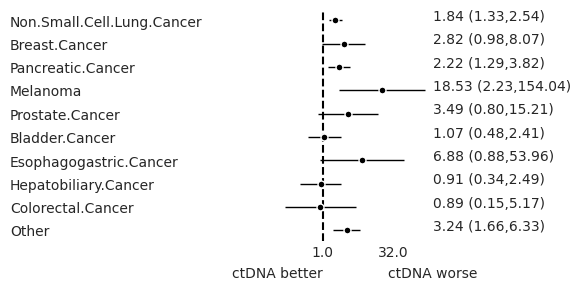

In [5]:
df = pd.read_csv('Routputs/cancerStrat_ctDNA_CAT.csv',index_col=0)
HRs = pd.Series(list(zip(df['exp(coef)'], 
                         df['2.5%'], 
                         df['97.5%'])),
               index = df.index)
myForest(HRs,'ctDNA worse','ctDNA better','figures/forest_CAT_cancertype.pdf',(2,3))

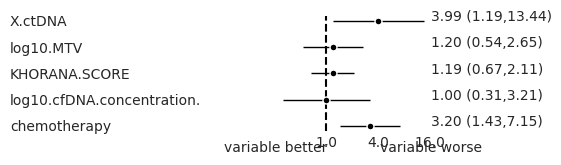

In [6]:
df = pd.read_csv('Routputs/multivar_MTV.csv',index_col=0)
HRs = pd.Series(list(zip(df['exp(coef)'], 
                         df['2.5%'], 
                         df['97.5%'])),
               index = df.index)
myForest(HRs,'variable worse','variable better','figures/forest_CAT_multivar_MTV.pdf',(2,1.5))

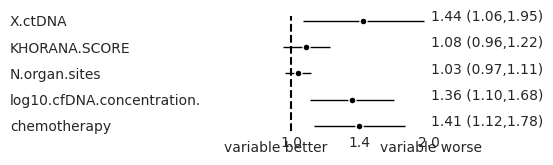

In [38]:
df = pd.read_csv('Routputs/multivar_ctDNA_CAT_stageIV.csv',index_col=0)
HRs = pd.Series(list(zip(df['exp(coef)'], 
                         df['2.5%'], 
                         df['97.5%'])),
               index = df.index)
myForest(HRs,'variable worse','variable better','figures/forest_CAT_multivar_stageIV.pdf',(2,1.5))

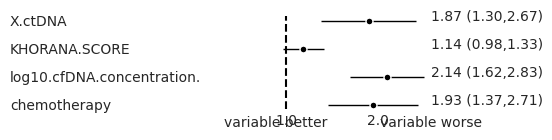

In [41]:
df = pd.read_csv('Routputs/multivar_ctDNA_CAT_notstageIV.csv',index_col=0)
HRs = pd.Series(list(zip(df['exp(coef)'], 
                         df['2.5%'], 
                         df['97.5%'])),
               index = df.index)
myForest(HRs,'variable worse','variable better','figures/forest_CAT_multivar_notstageIV.pdf',(2,1.2))

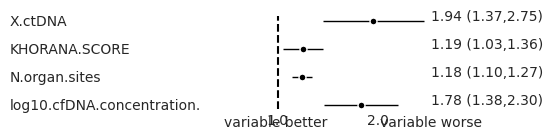

In [42]:
df = pd.read_csv('Routputs/multivar_ctDNA_CAT_nochemotherapy.csv',index_col=0)
HRs = pd.Series(list(zip(df['exp(coef)'], 
                         df['2.5%'], 
                         df['97.5%'])),
               index = df.index)
myForest(HRs,'variable worse','variable better','figures/forest_CAT_multivar_nochemo.pdf',(2,1.2))

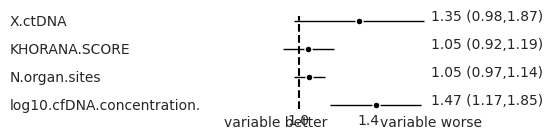

In [43]:
df = pd.read_csv('Routputs/multivar_ctDNA_CAT_chemotherapy.csv',index_col=0)
HRs = pd.Series(list(zip(df['exp(coef)'], 
                         df['2.5%'], 
                         df['97.5%'])),
               index = df.index)
myForest(HRs,'variable worse','variable better','figures/forest_CAT_multivar_chemo.pdf',(2,1.2))

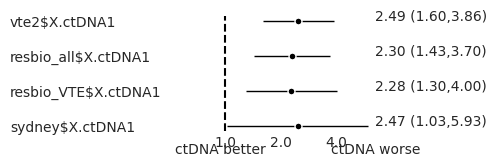

In [5]:
df = pd.read_csv('Routputs/validation_ctDNA_CAT.csv',index_col=0)
HRs = pd.Series(list(zip(df['exp(coef)'], 
                         df['2.5%'], 
                         df['97.5%'])),
               index = df.index)
myForest(HRs,'ctDNA worse','ctDNA better','figures/forest_CAT_validation_FG.pdf',(2,1.5))

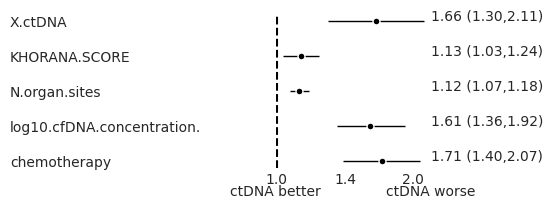

In [9]:
multivar = pd.read_csv('Routputs/ctdna_cat_multivar.txt',sep='\s+')
HRs = pd.Series(list(zip(multivar['exp(coef)'], 
                         multivar['2.5%'], 
                         multivar['97.5%'])),
               index = multivar.Var)
myForest(HRs,'ctDNA worse','ctDNA better','figures/forest_CAT_multivar.pdf',(2,2))

In [11]:
model2dROC = {}
for c in ["Khorana.Score","LB.","All"]:
     model2dROC[c] = pd.read_csv('rsf_scores/vte2_ '+c+' _dROC.csv')

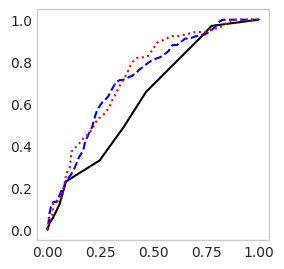

In [25]:
fig,ax = plt.subplots(figsize=(3,3))
ax.plot(model2dROC["Khorana.Score"]['FP'],model2dROC["Khorana.Score"]['TP'],'k')
ax.plot(model2dROC["LB."]['FP'],model2dROC["LB."]['TP'],'b--')
ax.plot(model2dROC["All"]['FP'],model2dROC["All"]['TP'],'r:')
ax.grid(False)
fig.savefig('figures/vte2_dROC.pdf',format='pdf')

In [32]:
def Find_Optimal_Cutoff(tpr, fpr, threshold):
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold'])[0]

Find_Optimal_Cutoff(model2dROC["Khorana.Score"]['TP'],
                    model2dROC["Khorana.Score"]['FP'],
                    model2dROC["Khorana.Score"]['cut.values'])

67.2065299150669

In [57]:
for c in ["Khorana.Score","LB.","All"]:
    print(c)
    threshold = Find_Optimal_Cutoff(model2dROC[c]['TP'],
                    model2dROC[c]['FP'],
                    model2dROC[c]['cut.values'])
    tpr = list(model2dROC[c][model2dROC[c]['cut.values']==threshold]['TP'])[0]
    fpr = list(model2dROC[c][model2dROC[c]['cut.values']==threshold]['FP'])[0]
    print('p:'+str(tpr))
    print('r:'+str(tpr / (tpr + fpr)))

Khorana.Score
p:0.656539711591387
r:0.5843379469918253
LB.
p:0.686007528370768
r:0.6854104165874112
All
p:0.667923119229827
r:0.6673865553607502


# barcharts of c-indexes

In [3]:
vte_rsf_scores = pd.read_csv('rsf_scores/vte_rsf_scores.csv',index_col=0)
vte_rsf_scores['LB+'] = pd.read_csv('rsf_scores/vte_rsf_scores_lbonly.csv',index_col=0)['LB+']
vte_rsf_scores_resbio = pd.read_csv('rsf_scores/vte_rsf_scores_resbio.csv',index_col=0)#,squeeze=True)
vte_rsf_scores_resbio.loc['LB+'] = pd.read_csv('rsf_scores/vte_rsf_scores_resbio_lbonly.csv',index_col=0).loc['LB+','0']
vte_rsf_scores_sydney = pd.read_csv('rsf_scores/vte_rsf_scores_sydney.csv',index_col=0)
vte_rsf_scores_sydney.loc['LB+'] = pd.read_csv('rsf_scores/vte_rsf_scores_sydney_lbonly.csv',index_col=0).loc['LB+','0']
vte_rsf_scores_nochemo = pd.read_csv('rsf_scores/vte_rsf_scores_nochemotherapy.csv',index_col=0)
vte_rsf_scores_newchemo = pd.read_csv('rsf_scores/vte_rsf_scores_newchemotherapy.csv',index_col=0)

vte_rsf_scores_nochemo = vte_rsf_scores_nochemo.applymap(lambda s: literal_eval(s.replace('nan','None')))
vte_rsf_scores_newchemo = vte_rsf_scores_newchemo.applymap(lambda s: literal_eval(s.replace('nan','None')))
vte_rsf_scores = vte_rsf_scores.applymap(lambda s: literal_eval(s.replace('nan','None')))

vte2_rsf_scores = pd.read_csv('rsf_scores/vte_rsf_scores_vte2_validation.csv',index_col=0)
vte2_rsf_scores = vte2_rsf_scores.applymap(lambda x: literal_eval(x)[0])

In [4]:
common_cancers = ['Non-Small Cell Lung Cancer','Breast Cancer','Pancreatic Cancer','Melanoma',
          'Prostate Cancer','Bladder Cancer','Esophagogastric Cancer',
          'Hepatobiliary Cancer','Colorectal Cancer']

less_common_cancers = ['Cancer of Unknown Primary','Histiocytosis','Germ Cell Tumor',
          'Neoplastic Vs Reactive','Endometrial Cancer','Small Cell Lung Cancer','Soft Tissue Sarcoma','Gastrointestinal Stromal Tumor']

scores = pd.DataFrame(columns = vte_rsf_scores.columns, index=['All']+common_cancers)
scorevars = pd.DataFrame(columns = vte_rsf_scores.columns, index=['All']+common_cancers)

scores_nochemo = pd.DataFrame(columns = vte_rsf_scores_nochemo.columns, index=['All']+common_cancers)
scorevars_nochemo = pd.DataFrame(columns = vte_rsf_scores_nochemo.columns, index=['All']+common_cancers)

scores_newchemo = pd.DataFrame(columns = vte_rsf_scores_newchemo.columns, index=['All']+common_cancers)
scorevars_newchemo = pd.DataFrame(columns = vte_rsf_scores_newchemo.columns, index=['All']+common_cancers)


for i in range(len(['All']+common_cancers)):
    scores.iloc[i] = vte_rsf_scores.applymap(lambda x: x[i]).mean()
    scorevars.iloc[i]=vte_rsf_scores.applymap(lambda x: x[i]).std()/np.sqrt(5)*2
    
    scores_nochemo.iloc[i] = vte_rsf_scores_nochemo.applymap(lambda x: x[i]).mean()
    scorevars_nochemo.iloc[i]=vte_rsf_scores_nochemo.applymap(lambda x: x[i]).std()/np.sqrt(5)*2
    
    scores_newchemo.iloc[i] = vte_rsf_scores_newchemo.applymap(lambda x: x[i]).mean()
    scorevars_newchemo.iloc[i]=vte_rsf_scores_newchemo.applymap(lambda x: x[i]).std()/np.sqrt(5)*2

In [5]:
scores.loc['No chemotherapy'] = scores_nochemo.loc['All']
scores.loc['New chemotherapy'] = scores_newchemo.loc['All']
scorevars.loc['No chemotherapy'] = scorevars_nochemo.loc['All']
scorevars.loc['New chemotherapy'] = scorevars_newchemo.loc['All']

In [16]:
scores = pd.concat([scores,vte2_rsf_scores]).rename(index={0:'Validation (MSK-ACCESS)'})
scores = pd.concat([scores, vte_rsf_scores_resbio.T]).rename(index={'0':'ctDx Lung (MSK, validation)'})
scores = pd.concat([scores, vte_rsf_scores_sydney.T]).rename(index={'0':'ctDx Lung (Sydney, validation)'})

In [17]:
columns = ['Khorana Score','KS Components','Metastatic Sites','Demographics','Liquid Biopsy','LB+ (no genes)','LB+','All']
scores = scores[columns] 
scorevars = scorevars[columns] 

In [18]:
scorevars.loc['Validation (MSK-ACCESS)']=0
scorevars.loc['ctDx Lung (MSK, validation)']=0
scorevars.loc['ctDx Lung (Sydney, validation)']=0

In [19]:
scores.astype(float).round(2).astype(str) + ' (' +scorevars.astype(float).round(2).astype(str)+')'

,Khorana Score,KS Components,Metastatic Sites,Demographics,Liquid Biopsy,LB+ (no genes),LB+,All
All,0.63 (0.03),0.66 (0.04),0.62 (0.04),0.67 (0.03),0.72 (0.03),0.73 (0.02),0.74 (0.02),0.75 (0.02)
Non-Small Cell Lung Cancer,0.55 (0.03),0.55 (0.04),0.56 (0.03),0.56 (0.05),0.68 (0.05),0.68 (0.04),0.69 (0.04),0.7 (0.04)
Breast Cancer,0.54 (0.16),0.58 (0.1),0.62 (0.11),0.56 (0.05),0.66 (0.16),0.61 (0.18),0.65 (0.18),0.66 (0.17)
Pancreatic Cancer,0.48 (0.08),0.52 (0.09),0.6 (0.06),0.57 (0.08),0.68 (0.13),0.65 (0.14),0.68 (0.12),0.68 (0.14)
Melanoma,0.43 (0.04),0.71 (0.22),0.81 (0.1),0.46 (0.04),0.81 (0.17),0.81 (0.19),0.83 (0.18),0.85 (0.17)
Prostate Cancer,0.71 (0.12),0.73 (0.07),0.55 (0.23),0.61 (0.29),0.73 (0.13),0.73 (0.05),0.72 (0.08),0.74 (0.06)
Bladder Cancer,0.53 (0.1),0.48 (0.09),0.61 (0.14),0.54 (0.04),0.6 (0.11),0.64 (0.15),0.63 (0.15),0.62 (0.19)
Esophagogastric Cancer,0.56 (0.21),0.59 (0.21),0.54 (0.22),0.71 (0.22),0.79 (0.13),0.71 (0.15),0.8 (0.13),0.75 (0.19)
Hepatobiliary Cancer,0.53 (0.07),0.58 (0.22),0.35 (0.16),0.61 (0.23),0.63 (0.17),0.61 (0.12),0.61 (0.16),0.57 (0.18)
Colorectal Cancer,0.58 (0.26),0.52 (0.35),0.6 (0.18),0.58 (0.32),0.68 (0.2),0.7 (0.2),0.71 (0.16),0.72 (0.22)


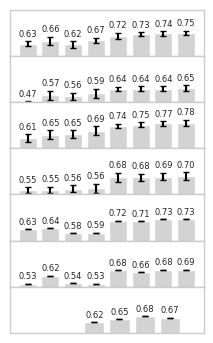

In [21]:
dftemp = scores.loc[['All','New chemotherapy','No chemotherapy','Non-Small Cell Lung Cancer',
                     'Validation (MSK-ACCESS)','ctDx Lung (MSK, validation)','ctDx Lung (Sydney, validation)']]
dftemp_vars = scorevars.loc[['All','No chemotherapy','No chemotherapy','Non-Small Cell Lung Cancer',
                     'Validation (MSK-ACCESS)','ctDx Lung (MSK, validation)','ctDx Lung (Sydney, validation)']]

fig,ax=plt.subplots(figsize=(2.5,0.6*len(dftemp)),nrows=len(dftemp))
for i in range(len(dftemp)):
    bar=ax[i].bar(dftemp.columns,dftemp.iloc[i].values,
                yerr=dftemp_vars.iloc[i].astype(float),
              edgecolor='white',facecolor='lightgray',ecolor='k',capsize=2)
    ax[i].bar_label(bar, fmt='%.2f',fontsize=6,padding=2)
    ax[i].set_ylim(0.5,1)
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].grid(False)
plt.subplots_adjust(wspace=0, hspace=0)
fig.savefig('figures/cindex_vte_rsf_errorbars.pdf',format='pdf')

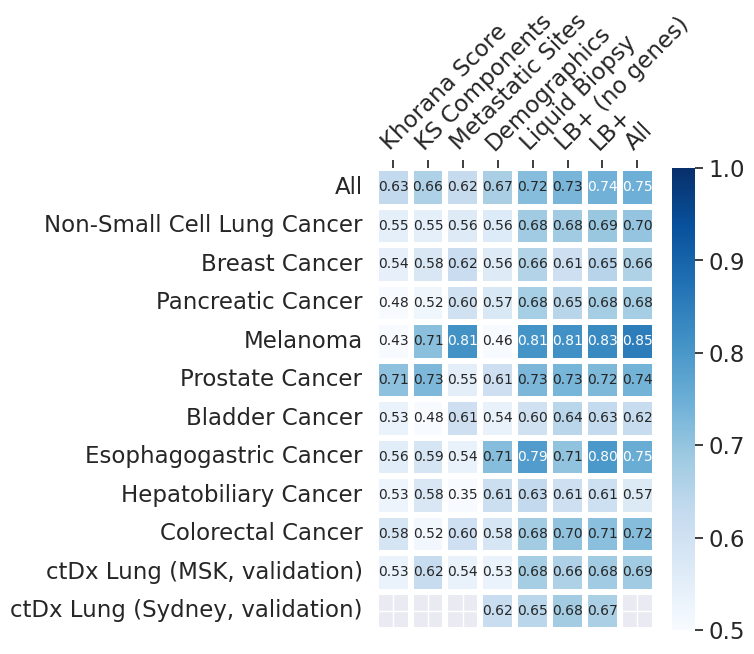

In [40]:
fig, ax = plt.subplots(figsize=(4.5,6))
sns.set(font_scale=1.5)
g = sns.heatmap(data=scores.astype(float),annot=True,fmt='.2f',
            linewidths=3,linecolor='w',cmap='Blues',
            vmin=0.5, vmax=1, annot_kws={"fontsize":10}, ax=ax)
ax.set_xticklabels(scores.columns,rotation=45, ha='left',rotation_mode='anchor')
ax.xaxis.tick_top()
fig.savefig('figures/VTE_RSF_heatmap.pdf',format='pdf')

# sydney+MSK resbio analysis

In [2]:
resbio_VTE = pd.read_csv('data/resbio_VTE_processed.csv')
vte = pd.read_csv('data/xs_VTE_main_processed.csv')
vte.loc[vte['CAT_DEATH_ENDPT']=='False','CAT_DEATH_ENDPT']=0
vte.loc[vte['CAT_DEATH_ENDPT']=='True','CAT_DEATH_ENDPT']=1
vte.loc[vte['CAT_DEATH_ENDPT']=='2','CAT_DEATH_ENDPT']=2
vte2 = pd.read_csv('data/vte2_main.csv')
sydney = pd.read_csv('data/sydney_processed.csv')

sydney['dead']=~sydney['Date of VTE'].isna()
sydney['MRN'] = sydney['Resolution Patient ID']
resbio_all = pd.concat([resbio_VTE,sydney]).reset_index()
resbio_all['start']=0

sydney_unfiltered = pd.read_csv('data/sydney_5_19_23.csv')
sydney_unfiltered['metastatic_datetime']=pd.to_datetime(sydney_unfiltered['metastatic_datetime'])
sydney_unfiltered['resbio_datetime']=pd.to_datetime(sydney_unfiltered['resbio_datetime'])
sydney_unfiltered['lt_start']=(sydney_unfiltered['resbio_datetime']-sydney_unfiltered['metastatic_datetime']).dt.days

sydney = pd.merge(sydney,sydney_unfiltered[['MRN','lt_start']],on='MRN')

In [4]:
vte[['SAMPLE_ID','log10(cfDNA concentration)','stop','CAT_DEATH_ENDPT',
           'DMETS_DX_ADRENAL',
 'DMETS_DX_BONE',
 'DMETS_DX_BRAIN',
 'DMETS_DX_LIVER',
 'DMETS_DX_LUNG',
 'DMETS_DX_LYMPH',
 'DMETS_DX_PLEURA',
 'DMETS_DX_OTHER','N organ sites',
          'BMI',
 'Platelets',
 'HGB',
 'WBC','KHORANA SCORE',
          'chemotherapy',
 'mid_chemotherapy',
 'prior_chemotherapy',
 'new_chemotherapy',
          'previous enoxaparin|dalteparin|xaban|warfarin|fondaparinux|dabigatran','STAGE_IV_DX']].to_csv('ctdna_cat/data/discovery.csv',index=False)

In [7]:
vte2[['SAMPLE_ID','log10(cfDNA concentration)','stop','CAT_DEATH_ENDPT',
           'DMETS_DX_ADRENAL',
 'DMETS_DX_BONE',
 'DMETS_DX_BRAIN',
 'DMETS_DX_LIVER',
 'DMETS_DX_LUNG',
 'DMETS_DX_LYMPH',
 'DMETS_DX_PLEURA',
 'DMETS_DX_OTHER','N organ sites',
          'BMI',
 'Platelets.',
 'HGB',
 'WBC','KHORANA SCORE',
          'chemotherapy',
 'mid_chemotherapy',
 'prior_chemotherapy',
 'new_chemotherapy',
          'STAGE_IV_DX']].to_csv('ctdna_cat/data/validation.csv',index=False)

In [8]:
sydney[['Resolution Patient ID','log10(cfDNA concentration)','stop','CAT_DEATH_ENDPT']].to_csv('ctdna_cat/data/generalizability_sydney.csv',index=False)

In [9]:
resbio_VTE[['Subject #','log10(cfDNA concentration)','stop','CAT_DEATH_ENDPT',
           'DMETS_DX_ADRENAL',
 'DMETS_DX_BONE',
 'DMETS_DX_BRAIN',
 'DMETS_DX_LIVER',
 'DMETS_DX_LUNG',
 'DMETS_DX_LYMPH',
 'DMETS_DX_PLEURA',
 'DMETS_DX_OTHER','N organ sites',
          'BMI',
 'Platelets',
 'HGB',
 'WBC','KHORANA SCORE',
          'chemotherapy']].to_csv('ctdna_cat/data/generalizability_msk.csv',index=False)

In [7]:
#vte2_risk_scores = pd.read_csv('rsf_scores/vte_riskscores_vte2_val.csv')
#vte2_risk_scores = pd.merge(vte2,vte2_risk_scores,left_index=True,right_index=True)
#vte2_risk_scores.to_csv('data/vte2_main_wriskscores.csv',index=False)

In [9]:
demographics_cols = ['AGE','MALE','WHITE', 'ASIAN-FAR EAST/INDIAN SUBCONT', 'BLACK OR AFRICAN AMERICAN']
metsitemap = pd.read_csv('metsitemap.txt')
met_cols = ['N organ sites']+list(metsitemap.SITE_GENIE.unique())
common_cancers = ['Non-Small Cell Lung Cancer','Breast Cancer','Pancreatic Cancer','Melanoma',
          'Prostate Cancer','Bladder Cancer','Esophagogastric Cancer',
          'Hepatobiliary Cancer','Colorectal Cancer']
#ctDNA_cols = list(xs_common_genes)+['+ctDNA','log10(max VAF)','log10(cfDNA concentration)']
ks_cols = ['KHORANA SCORE','chemotherapy']
#ks_component_cols = ['BMI','Platelets','HGB','WBC','chemotherapy']+common_cancers
other_cols = ['lt_start']  #'Albumin'
#ks_ctDNA_simple_cols = ks_component_cols+['KHORANA SCORE','lt_start']+met_cols+common_cancers+['+ctDNA','log10(max VAF)','log10(cfDNA concentration)']
#allcols = ks_component_cols+['KHORANA SCORE']+met_cols+ctDNA_cols+other_cols+demographics_cols

# generate Table 1 data
def mySummary(df,name):
    summ = []
    for c in df.columns:
        s = df[c]
        if 'HAS_'+c in df.columns:
            s = df[df['HAS_'+c]][c]
        if s.fillna(False).dtype=='bool' or len(s.value_counts())<=2:
            summ+=[str(sum(s.fillna(False)))+' ('+str(round(100*s.fillna(False).mean()))+'%)']
        else:
            # check if int or float
            tempsumm=''
            s = s.dropna()
            if c=='KHORANA SCORE':
                x = s.value_counts().to_dict()
                tempsumm = [(str(k))+':'+str(x[k]) for k in sorted(x)]
            elif np.array_equal(s, s.astype(int)) or c=='AGE':
                tempsumm = str(int(s.median()))+' ('+str(int(s.quantile(0.05)))+'-'+str(int(s.quantile(0.95)))+')'
            else:
                tempsumm = str(round(s.median(),2))+' ('+str(round(s.quantile(0.05),2))+'-'+str(round(s.quantile(0.95),2))+')'
            summ+=[tempsumm]
    return pd.Series(summ,index=df.columns,name=name+' N='+str(len(df)))

for i in range(6):
    vte['Khorana Score '+str(i)]=vte['KHORANA SCORE']==i
    vte2['Khorana Score '+str(i)]=vte2['KHORANA SCORE']==i
resbio_all = pd.concat([resbio_VTE,sydney]).reset_index()
for i in range(6):
    resbio_all['Khorana Score '+str(i)]=resbio_all['KHORANA']==i
    
tableCols = demographics_cols+common_cancers+['lt_start','chemotherapy','+ctDNA','log10(cfDNA concentration)']+['Khorana Score '+str(i) for i in range(6)]+met_cols

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pd.concat([mySummary(vte[vte.stop>=0][tableCols],'MSK-ACCESS Discovery'),
                       mySummary(vte2[vte2.stop>=0][tableCols],'MSK-ACCESS Validation'),
                      mySummary(resbio_all[resbio_all.stop>=0][tableCols],'ctDx Lung')],axis=1))

,MSK-ACCESS Discovery N=4141,MSK-ACCESS Validation N=1426,ctDx Lung N=460
AGE,64 (11-82),66 (29-83),67 (47-84)
MALE,1905 (46%),703 (49%),190 (41%)
WHITE,3119 (75%),1047 (73%),293 (64%)
ASIAN-FAR EAST/INDIAN SUBCONT,467 (11%),156 (11%),95 (21%)
BLACK OR AFRICAN AMERICAN,288 (7%),92 (6%),19 (4%)
Non-Small Cell Lung Cancer,1408 (34%),456 (32%),460 (100%)
Breast Cancer,523 (13%),112 (8%),0 (0%)
Pancreatic Cancer,408 (10%),231 (16%),0 (0%)
Melanoma,306 (7%),65 (5%),0 (0%)
Prostate Cancer,222 (5%),101 (7%),0 (0%)


In [9]:
vtemain_risk_scores = pd.read_csv('rsf_scores/vte_mskaccess_risk_scores.csv')
vte['LB+ Risk'] = vtemain_risk_scores['Liquid Biopsy+chemotherapy']

In [22]:
vc = vte.CANCER_TYPE.value_counts()
common_cancers = vc[vc>100].index

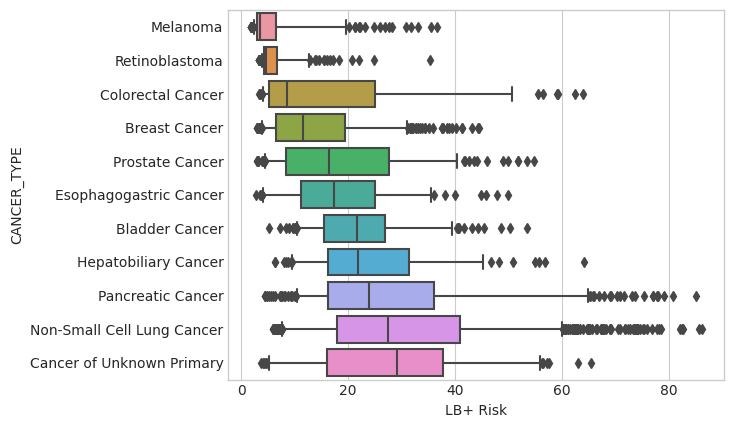

In [24]:
fig,ax=plt.subplots()
median_values = vte[vte.CANCER_TYPE.isin(common_cancers)].groupby('CANCER_TYPE')['LB+ Risk'].median()
sorted_categories = median_values.sort_values().index
sns.boxplot(data=vte,y='CANCER_TYPE', x='LB+ Risk', order=sorted_categories,whis=(5,95))
plt.show()

# multivar analysis

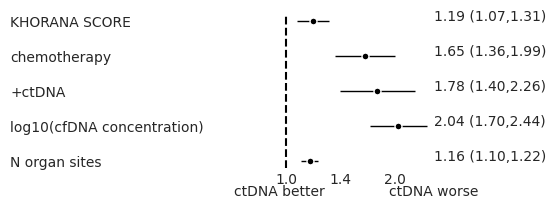

In [13]:
cph = CoxPHFitter()
cph.fit(vte[['KHORANA SCORE','chemotherapy','+ctDNA','log10(cfDNA concentration)','N organ sites','dead','stop']], 'stop','dead')

HRs = pd.Series(list(zip(cph.summary['exp(coef)'], 
                         cph.summary['exp(coef) lower 95%'], 
                         cph.summary['exp(coef) upper 95%'])),
               index = cph.summary.index)
myForest(HRs,'ctDNA worse','ctDNA better','figures/forest_CAT_multivar.pdf',(2,2))

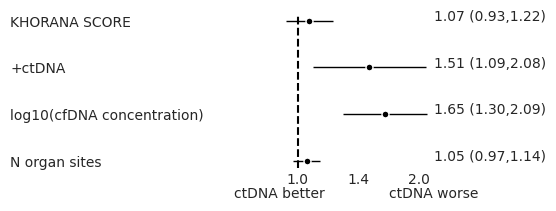

In [8]:
cph = CoxPHFitter()
cph.fit(vte[(vte['stop']>=0) & vte.chemotherapy][['KHORANA SCORE','+ctDNA','log10(cfDNA concentration)','N organ sites','dead','stop']], 'stop','dead')

HRs = pd.Series(list(zip(cph.summary['exp(coef)'], 
                         cph.summary['exp(coef) lower 95%'], 
                         cph.summary['exp(coef) upper 95%'])),
               index = cph.summary.index)
myForest(HRs,'ctDNA worse','ctDNA better','figures/forest_CAT_multivar_chemotherapy.pdf',(2,2))

In [14]:
mtv = pd.read_csv('data/MTV_128_mrn.csv')
mtv['log10(MTV)'] = np.log10(mtv['MTV']+1)
mtv = pd.merge(pd.concat([vte,resbio_VTE]),mtv,on='MRN')[['KHORANA SCORE','chemotherapy','+ctDNA','log10(cfDNA concentration)','N organ sites','MTV','log10(MTV)','Max SUV','Mean SUV','N lesions','vol*mean SUV','dead','stop']]

In [24]:
cph = CoxPHFitter()
cph.fit(mtv[['MTV','dead','stop']], 'stop','dead')
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
MTV,0.000328,1.000328,0.000146,0.000041,0.000614,1.000041,1.000614,0.0,2.242257,0.024945,5.325118


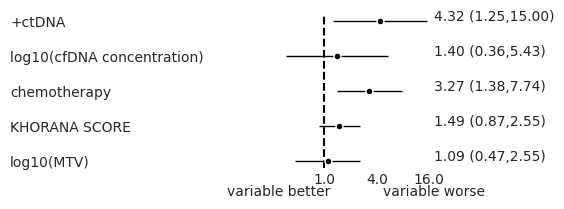

In [15]:
cph = CoxPHFitter()
cph.fit(mtv[['+ctDNA','log10(cfDNA concentration)','chemotherapy','KHORANA SCORE','log10(MTV)','dead','stop']], 'stop','dead')
cph.summary

HRs = pd.Series(list(zip(cph.summary['exp(coef)'], 
                         cph.summary['exp(coef) lower 95%'], 
                         cph.summary['exp(coef) upper 95%'])),
               index = cph.summary.index)
myForest(HRs,'variable worse','variable better','figures/forest_CAT_multivar_nochemotherapy.svg',(2,2))

In [8]:
cph = CoxPHFitter()
cph.fit(resbio_VTE[['KHORANA SCORE','chemotherapy','+ctDNA','log10(cfDNA concentration)','N organ sites','dead','stop']], 'stop','dead')
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
KHORANA SCORE,0.510723,1.666495,0.131280,0.253419,0.768026,1.288423,2.155507,0.0,3.890339,0.000100,13.286208
chemotherapy,0.119571,1.127013,0.240616,-0.352028,0.591169,0.703261,1.806099,0.0,0.496936,0.619234,0.691443
+ctDNA,0.821932,2.274891,0.316099,0.202390,1.441474,1.224326,4.226923,0.0,2.600239,0.009316,6.746093
log10(cfDNA concentration),0.440224,1.553054,0.400652,-0.345039,1.225486,0.708193,3.405822,0.0,1.098769,0.271869,1.879017
N organ sites,-0.021781,0.978454,0.075379,-0.169521,0.125959,0.844069,1.134236,0.0,-0.288953,0.772617,0.372174


In [9]:
cph = CoxPHFitter()
cph.fit(resbio_all[['chemotherapy','+ctDNA','log10(cfDNA concentration)','dead','stop']], 'stop','dead')
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
chemotherapy,0.142237,1.152850,0.220622,-0.290175,0.574648,0.748133,1.776506,0.0,0.644708,0.519116,0.945870
+ctDNA,1.147253,3.149529,0.265375,0.627127,1.667378,1.872225,5.298259,0.0,4.323139,0.000015,15.988350
log10(cfDNA concentration),0.216564,1.241803,0.288630,-0.349141,0.782269,0.705294,2.186427,0.0,0.750317,0.453064,1.142214


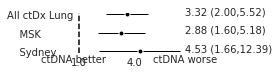

In [4]:
HRs = pd.Series()

resbio_anymut_set = set(resbio_all[resbio_all['+ctDNA']]['MRN'].unique())
resbio_nomut_set = set(resbio_all[~resbio_all['+ctDNA']]['MRN'].unique())


cph = CoxPHFitter()
cph.fit(resbio_all[['+ctDNA','dead','stop']], 'stop','dead')
foo = ('All ctDx Lung',(cph.summary['exp(coef)'].iloc[0],
                        cph.summary['exp(coef) lower 95%'].iloc[0],
                        cph.summary['exp(coef) upper 95%'].iloc[0]))
HRs.loc[foo[0]] = foo[1]

cph = CoxPHFitter()
cph.fit(resbio_all[~resbio_all.MRN.astype(str).str.contains('NCI')][['+ctDNA','dead','stop']], 'stop','dead')
foo = ('    MSK',(cph.summary['exp(coef)'].iloc[0],
                  cph.summary['exp(coef) lower 95%'].iloc[0],
                  cph.summary['exp(coef) upper 95%'].iloc[0]))
HRs.loc[foo[0]] = foo[1]

cph = CoxPHFitter()
cph.fit(resbio_all[resbio_all.MRN.astype(str).str.contains('NCI')][['+ctDNA','dead','stop']], 'stop','dead')
foo = ('    Sydney',(cph.summary['exp(coef)'].iloc[0],
                     cph.summary['exp(coef) lower 95%'].iloc[0],
                     cph.summary['exp(coef) upper 95%'].iloc[0]))
HRs.loc[foo[0]] = foo[1]

myForest(HRs,'ctDNA worse','ctDNA better','figures/forest_resbio_CAT.svg',(2,0.75))

# AJFs

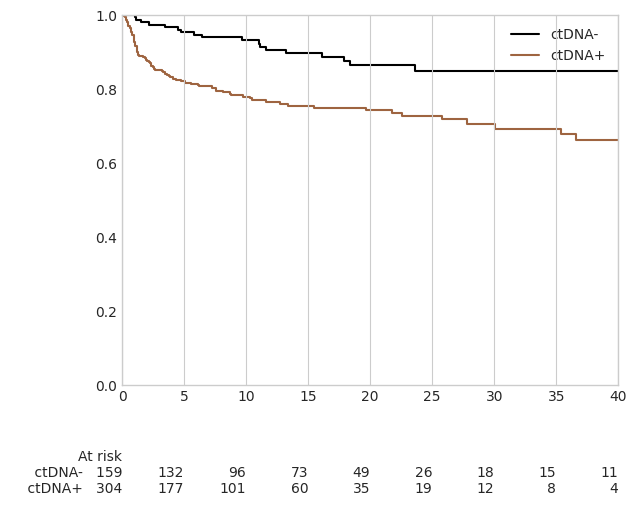

In [3]:
from lifelines import AalenJohansenFitter
from lifelines.plotting import add_at_risk_counts

def plotAJF(df,label,ax,**kwargs):
    stopcol='stop'
    startcol='start'
    if 'stop' in kwargs:
        stopcol=kwargs['stop']
    if 'start' in kwargs:
        startcol=kwargs['start']
        
    df.loc[df[stopcol]<=df[startcol],stopcol] = df[df[stopcol]<=df[startcol]][startcol]+1
    
    aj1 = AalenJohansenFitter()
    aj1.fit(durations=df[stopcol]/daysinmo, 
                     event_observed=df['CAT_DEATH_ENDPT'], 
                     event_of_interest=1,label=label, entry=df[startcol]/daysinmo)
    ax.step(aj1.cumulative_density_.index,1-aj1.cumulative_density_['CIF_1'],label=label)
    
    return aj1

fig, ax=plt.subplots()
resbio_all.loc[resbio_all['stop']<=0,'stop']=1
ax.set_prop_cycle(color=[plt.cm.copper(i) for i in np.linspace(0, 1, 3)])
aj1 = plotAJF(resbio_all[~resbio_all['+ctDNA'] & (resbio_all['stop']>=0)],'ctDNA-',ax)
aj2 = plotAJF(resbio_all[resbio_all['+ctDNA'] & (resbio_all['stop']>=0)],'ctDNA+',ax)
ax.grid(visible=False)
ax.set_ylim(0,1)
ax.set_xlim(0,40)
add_at_risk_counts(aj1, aj2, ax=ax, rows_to_show=['At risk'])
ax.legend()

fig.savefig('figures/ctDNA_CAT_resbio_all.pdf', format='pdf')

In [14]:
cph = CoxPHFitter()
cph.fit(vte[['+ctDNA','dead','stop']], 'stop','dead')
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
+ctDNA,1.041168,2.832523,0.1143,0.817144,1.265192,2.264024,3.543774,0.0,9.109061,8.309839e-20,63.383741


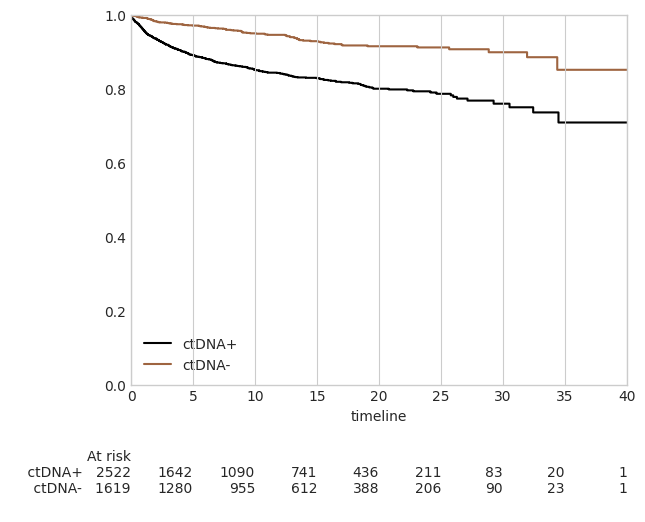

In [12]:
fig, ax=plt.subplots()
ax.set_prop_cycle(color=[plt.cm.copper(i) for i in np.linspace(0, 1, 3)])

f1 = KaplanMeierFitter()
f1.fit(vte[vte['+ctDNA']]['stop']/30.4,vte[vte['+ctDNA']]['dead'],label='ctDNA+')
f1.plot(ax=ax,ci_show=False)

f2 = KaplanMeierFitter()
f2.fit(vte[~vte['+ctDNA']]['stop']/30.4,vte[~vte['+ctDNA']]['dead'],label='ctDNA-')
f2.plot(ax=ax,ci_show=False)

ax.grid(visible=False)
ax.set_ylim(0,1)
ax.set_xlim(0,40)
add_at_risk_counts(f1, f2, ax=ax, rows_to_show=['At risk'])
ax.legend()

fig.savefig('figures/vte_KM.pdf',format='pdf')

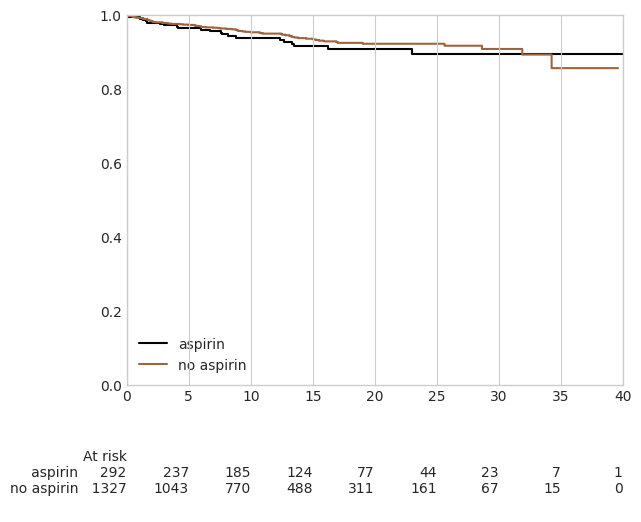

In [17]:
fig, ax=plt.subplots()

ax.set_prop_cycle(color=[plt.cm.copper(i) for i in np.linspace(0, 1, 3)])
aj1 = plotAJF(vte[~vte['+ctDNA'] & vte['previous aspirin']],'aspirin',ax,start='start',stop='stop')
aj2 = plotAJF(vte[~vte['+ctDNA'] & ~vte['previous aspirin']],'no aspirin',ax,start='start',stop='stop')
ax.grid(visible=False)
ax.set_ylim(0,1)
ax.set_xlim(0,40)
add_at_risk_counts(aj1, aj2, ax=ax, rows_to_show=['At risk'])
ax.legend()

fig.savefig('figures/ctDNA_CAT_aspirin_ctDNAneg.pdf', format='pdf')

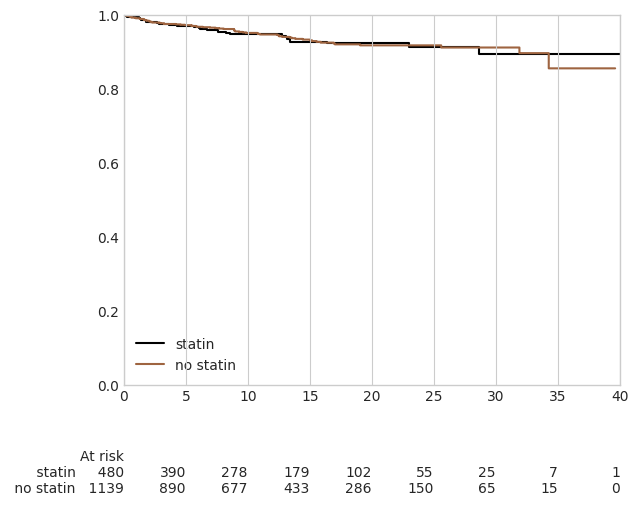

In [13]:
fig, ax=plt.subplots()

ax.set_prop_cycle(color=[plt.cm.copper(i) for i in np.linspace(0, 1, 3)])
aj1 = plotAJF(vte[~vte['+ctDNA'] & vte['previous statin']],'statin',ax,start='start',stop='stop')
aj2 = plotAJF(vte[~vte['+ctDNA'] & ~vte['previous statin']],'no statin',ax,start='start',stop='stop')
ax.grid(visible=False)
ax.set_ylim(0,1)
ax.set_xlim(0,40)
add_at_risk_counts(aj1, aj2, ax=ax, rows_to_show=['At risk'])
ax.legend()

fig.savefig('figures/ctDNA_CAT_statin_ctDNAneg.pdf', format='pdf')

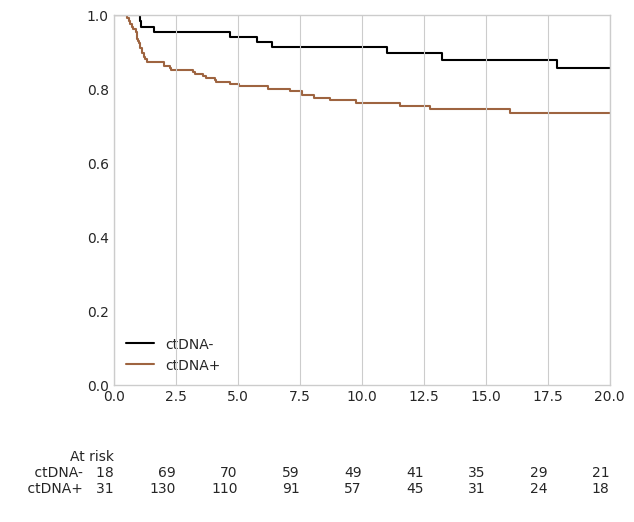

In [34]:
fig, ax=plt.subplots()

ax.set_prop_cycle(color=[plt.cm.copper(i) for i in np.linspace(0, 1, 3)])
resbio_all['lt_stop']=resbio_all['stop']#+resbio_all['lt_start']
aj1 = plotAJF(resbio_all[(~resbio_all['+ctDNA']) & (resbio_all['lt_stop']>=resbio_all['lt_start'])],'ctDNA-',ax,start='lt_start',stop='lt_stop')
aj2 = plotAJF(resbio_all[resbio_all['+ctDNA'] & (resbio_all['lt_stop']>=resbio_all['lt_start'])],'ctDNA+',ax,start='lt_start',stop='lt_stop')
ax.grid(visible=False)
ax.set_ylim(0,1)
ax.set_xlim(0,20)
add_at_risk_counts(aj1, aj2, ax=ax, rows_to_show=['At risk'])
ax.legend()

fig.savefig('figures/ctDNA_CAT_resbio_lt.pdf', format='pdf')

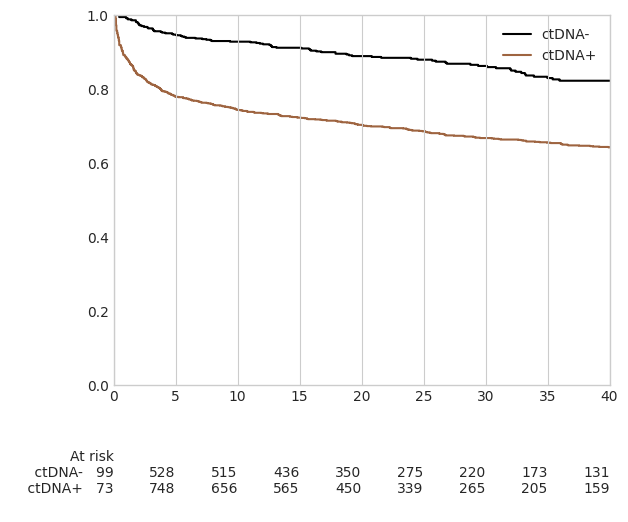

In [30]:
fig, ax=plt.subplots()

ax.set_prop_cycle(color=[plt.cm.copper(i) for i in np.linspace(0, 1, 3)])

aj1 = plotAJF(vte[(~vte['+ctDNA']) & (vte['lt_stop']>=vte['lt_start'])],'ctDNA-',ax,start='lt_start',stop='lt_stop')
aj2 = plotAJF(vte[vte['+ctDNA'] & (vte['lt_stop']>=vte['lt_start'])],'ctDNA+',ax,start='lt_start',stop='lt_stop')
ax.grid(visible=False)
ax.set_ylim(0,1)
ax.set_xlim(0,40)
add_at_risk_counts(aj1, aj2, ax=ax, rows_to_show=['At risk'])
ax.legend()

fig.savefig('figures/ctDNA_CAT_main_lt.pdf', format='pdf')

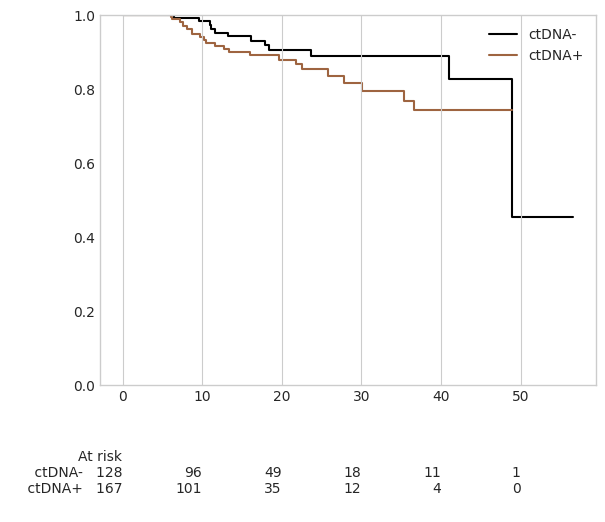

In [5]:
fig, ax=plt.subplots()

ax.set_prop_cycle(color=[plt.cm.copper(i) for i in np.linspace(0, 1, 3)])

aj1 = plotAJF(resbio_all[~resbio_all['+ctDNA'] & (resbio_all.stop>180)],'ctDNA-',ax)
aj2 = plotAJF(resbio_all[resbio_all['+ctDNA'] & (resbio_all.stop>180)],'ctDNA+',ax)
add_at_risk_counts(aj1, aj2, ax=ax, rows_to_show=['At risk'])
ax.grid(visible=False)
ax.set_ylim(0,1)
ax.legend()

fig.savefig('figures/ctDNA_CAT_resbio_6mo.pdf', format='pdf')

In [18]:
cph = CoxPHFitter()
cph.fit(resbio_all[resbio_all.stop>180][['+ctDNA','stop','dead']],'stop','dead')
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
+ctDNA,0.912023,2.489353,0.371486,0.183924,1.640122,1.201924,5.155797,0.0,2.455068,0.014086,6.149614


In [6]:
from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_curve, auc

def Find_Optimal_Cutoff(target, predicted):
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 

def runRF(df_train,df_tests,cois):
    
    X_train = df_train[cois].fillna(df_train[cois].median()).astype(float)
    y_train = df_train[['dead','stop']].apply(tuple, axis=1).values.tolist()
    y_train = np.array(y_train, dtype=[('Status', '?'), ('Survival_in_days', '<f8')])
    
    random_state = 20
    rsf = RandomSurvivalForest(n_estimators=1000,
                               min_samples_split=10,
                               min_samples_leaf=15,
                               n_jobs=-1,
                               random_state=random_state)
    rsf.fit(X_train, y_train)

    scores = []
    aucs = []
    df_test_auc_binary_list = []
    rsf_risk_scores_list = []
    if not type(df_tests)==list:
        df_tests = [df_tests]
    for df_test in df_tests:
        X_test = df_test[cois].fillna(df_test[cois].median()).astype(float)
        y_test = df_test[['dead','stop']].apply(tuple, axis=1).values.tolist()
        y_test = np.array(y_test, dtype=[('Status', '?'), ('Survival_in_days', '<f8')])
        scores+=[rsf.score(X_test, y_test)]
        
        '''
        # snapshot-in-time metrics
        t_eval=180
        mask = (df_test.stop>=t_eval) | ((df_test.stop<t_eval) & (df_test.dead))
        X_test_auc = X_test[mask]
        df_test_auc = df_test[mask]
        df_test_auc_binary = (df_test_auc.stop<t_eval) & (df_test_auc.dead)
        rsf_funcs = rsf.predict_cumulative_hazard_function(
                            X_test_auc, return_array=False)
        rsf_risk_scores = [func(t_eval) for func in rsf_funcs]
        
        fpr, tpr, thresholds = roc_curve(df_test_auc_binary, rsf_risk_scores, pos_label=1)
        roc_auc = auc(fpr, tpr)
        aucs += [roc_auc]
        df_test_auc_binary_list += [df_test_auc_binary]
        rsf_risk_scores_list += [rsf_risk_scores]
        '''
        
        rsf_risk_scores = rsf.predict(X_test)
        rsf_risk_scores_list += [rsf_risk_scores]
        
    return (rsf,scores,aucs,rsf_risk_scores_list) #df_test_auc_binary_list,rsf_risk_scores_list)

In [7]:
demographics_cols = ['AGE','MALE','WHITE', 'ASIAN-FAR EAST/INDIAN SUBCONT', 'BLACK OR AFRICAN AMERICAN']
metsitemap = pd.read_csv('metsitemap.txt')
met_cols = ['N organ sites']+list(metsitemap.SITE_GENIE.unique())
xs_mutations = pd.read_csv('data/data_mutations_extended_xs_1_6_23.txt',sep='\t',comment='#')
xs_vc = xs_mutations.Hugo_Symbol.value_counts().head(40)
xs_common_genes = xs_vc[xs_vc>len(xs_vc)*0.05].index
ctDNA_cols = list(set(xs_common_genes).intersection(set(vte.columns)))+['+ctDNA','log10(max VAF)','log10(cfDNA concentration)']
ks_cols = ['KHORANA SCORE','chemotherapy']
common_cancers = ['Non-Small Cell Lung Cancer','Breast Cancer','Pancreatic Cancer','Melanoma',
          'Prostate Cancer','Bladder Cancer','Esophagogastric Cancer',
          'Hepatobiliary Cancer','Colorectal Cancer']
ks_component_cols = ['BMI','Platelets','HGB','WBC','chemotherapy']+common_cancers
other_cols = ['lt_start']  #'Albumin'
allcols = ks_component_cols+['KHORANA SCORE']+met_cols+ctDNA_cols+other_cols+demographics_cols

cois_list = [ks_cols,
             #ks_component_cols,
             #met_cols+common_cancers,
             #ctDNA_cols+common_cancers,
             ctDNA_cols+common_cancers+['chemotherapy'],
             #common_cancers+demographics_cols+other_cols,
            allcols]
cois_list_names = ['Khorana Score',#'KS Components','Metastatic Sites',
                   #'Demographics',
                   #'Liquid Biopsy',
                   'Liquid Biopsy+chemotherapy',
                   'All']

In [6]:
def printCMStats(cm1):
    print('Confusion Matrix : \n', cm1)

    total1=sum(sum(cm1))
    #####from confusion matrix calculate accuracy
    accuracy1=(cm1[0,0]+cm1[1,1])/total1
    print ('Accuracy : ', accuracy1)

    sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    print('Sensitivity : ', sensitivity1 )

    specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    print('Specificity : ', specificity1)

Khorana Score
Liquid Biopsy+chemotherapy
All


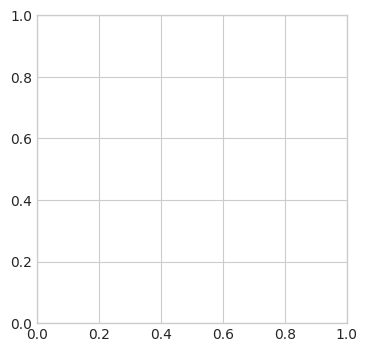

In [16]:
colors=['lightsteelblue','cornflowerblue','royalblue']
styles=['dashed','dotted','solid']
fig, ax = plt.subplots(figsize=(4,4))
dftemp = vte[(vte['stop']>=0)].reset_index()
df_rsf_risk_scores = pd.DataFrame()
for j, cois in enumerate(cois_list):
    print(cois_list_names[j])
    train = dftemp
    test = resbio_VTE
    result = runRF(train,test,cois)
        
    #threshold = Find_Optimal_Cutoff(list(result[3][0].values),result[4][0])
    #cm1=confusion_matrix(list(result[3][0].values),np.array(result[4][0])>threshold)
    #printCMStats(cm1)
    
    df_rsf_risk_scores[cois_list_names[j]] = result[3][0]
    '''
    fpr, tpr, thresholds = roc_curve(list(result[3][0].values), 
                                     result[4][0], pos_label=1)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr,tpr,color=colors[j],linestyle=styles[j],label=cois_list_names[j]+' (AUC = %0.2f)' % (result[2][0]))
    
ax.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
ax.legend()
ax.grid(False)
fig.savefig('figures/auroc_vte_rsf_validation.svg',format='svg')'''
    
pd.concat([resbio_VTE[['stop','dead']],df_rsf_risk_scores]).to_csv('vte_resbio_risk_scores.csv',index=False)

In [17]:
df_rsf_risk_scores['stop'] = resbio_VTE['stop']
df_rsf_risk_scores['dead'] = resbio_VTE['dead'].astype(int)
df_rsf_risk_scores.to_csv('vte_resbio_risk_scores.csv',index=False)

In [20]:
roc = pyroc.ROC(list(result[3][0].values), df_rsf_risk_scores)

In [21]:
p, ci = roc.compare(np.array([
    [0, -1,  1],
]))
print(p, ci)

0.5553822974780758 [[-0.02376326  0.04421724]]


In [22]:
p, ci = roc.compare(np.array([
    [-1, 0,  1],
]))
print(p, ci)

0.0014209891401013967 [[0.06185556 0.25892269]]


In [23]:
p, ci = roc.compare(np.array([
    [-1, 1,  0],
]))
print(p, ci)

0.0023868035014026324 [[0.0532639  0.24706038]]


Khorana Score
fold: 0
fold: 1
fold: 2
fold: 3
fold: 4
Liquid Biopsy+chemotherapy
fold: 0
fold: 1
fold: 2
fold: 3
fold: 4
All
fold: 0
fold: 1
fold: 2
fold: 3
fold: 4


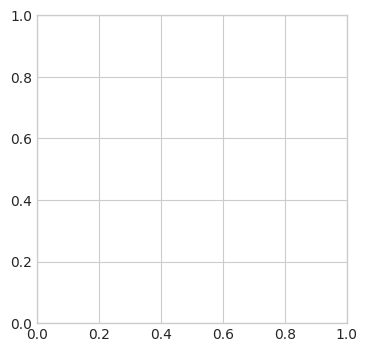

In [27]:
colors=['lightsteelblue','cornflowerblue','royalblue']
styles=['dashed','dotted','solid']

dftemp = vte[(vte['stop']>=0)].reset_index()

kf = KFold(n_splits=5)# Define the split - into n_splits folds 
kf.get_n_splits(dftemp) # returns the number of splitting iterations in the cross-validator

aucs = pd.DataFrame()
scores = pd.DataFrame()
sensitivities = pd.DataFrame()
specificities = pd.DataFrame()

fig, ax = plt.subplots(figsize=(4,4))

df_rsf_risk_scores = pd.DataFrame()
df_test_auc_binary = pd.DataFrame()

for j, cois in enumerate(cois_list):
    print(cois_list_names[j])
    test_auc_binary = []
    rsf_risk_scores = []
    for i, (train_index, test_index) in enumerate(kf.split(dftemp)):
        print(f'fold: {i}')
        train = dftemp.loc[train_index]
        test = dftemp.loc[test_index]
        
        #test = test[~test.chemotherapy]
        
        result = runRF(train,test,cois)
        scores.loc[i,cois_list_names[j]]=result[1][0]
        #aucs.loc[i,cois_list_names[j]]=result[2][0]
        
        #threshold = Find_Optimal_Cutoff(list(result[3][0].values),result[4][0])
        #cm1=confusion_matrix(list(result[3][0].values),np.array(result[4][0])>threshold)
        #sensitivities.loc[i,cois_list_names[j]] = cm1[0,0]/(cm1[0,0]+cm1[0,1])
        #specificities.loc[i,cois_list_names[j]] = cm1[1,1]/(cm1[1,0]+cm1[1,1])
        
        #test_auc_binary+=list(result[3][0].values)
        rsf_risk_scores+=list(result[3][0])

    df_rsf_risk_scores[cois_list_names[j]] = rsf_risk_scores
    #df_test_auc_binary[cois_list_names[j]] = test_auc_binary
    
    #fpr, tpr, thresholds = roc_curve(test_auc_binary, rsf_risk_scores, pos_label=1)
    #roc_auc = auc(fpr, tpr)
    #ax.plot(fpr,tpr,color=colors[j],linestyle=styles[j],label=cois_list_names[j]+' (AUC = %0.2f)' % (roc_auc))
    #threshold = Find_Optimal_Cutoff(test_auc_binary,rsf_risk_scores)
    #print(threshold)
    #cm=confusion_matrix(test_auc_binary,np.array(rsf_risk_scores)>threshold)
    #printCMStats(cm)
    
#ax.plot([0, 1], [0, 1], linestyle='--', color='red', label='Random Classifier')
#ax.legend()
#ax.grid(False)
#fig.savefig('figures/auroc_vte_rsf_nochemo.svg',format='svg')

In [28]:
df_rsf_risk_scores['stop'] = vte['stop']
df_rsf_risk_scores['dead'] = vte['dead'].astype(int)
df_rsf_risk_scores.to_csv('vte_mskaccess_risk_scores.csv',index=False)

In [63]:
sensitivities.mean()

Khorana Score                 0.976002
Liquid Biopsy+chemotherapy    0.744838
All                           0.742305
dtype: float64

In [64]:
specificities.mean()

Khorana Score                 0.059144
Liquid Biopsy+chemotherapy    0.719239
All                           0.720428
dtype: float64

In [65]:
aucs.mean()

Khorana Score                 0.647993
Liquid Biopsy+chemotherapy    0.802748
All                           0.816188
dtype: float64

In [66]:
sensitivities.std()/5**0.5*2

Khorana Score                 0.007611
Liquid Biopsy+chemotherapy    0.015459
All                           0.027160
dtype: float64

In [67]:
specificities.std()/5**0.5*2

Khorana Score                 0.034950
Liquid Biopsy+chemotherapy    0.022694
All                           0.011632
dtype: float64

In [68]:
aucs.std()/5**0.5*2

Khorana Score                 0.028342
Liquid Biopsy+chemotherapy    0.018290
All                           0.021362
dtype: float64

In [69]:
roc = pyroc.ROC(df_test_auc_binary['All'], df_rsf_risk_scores)

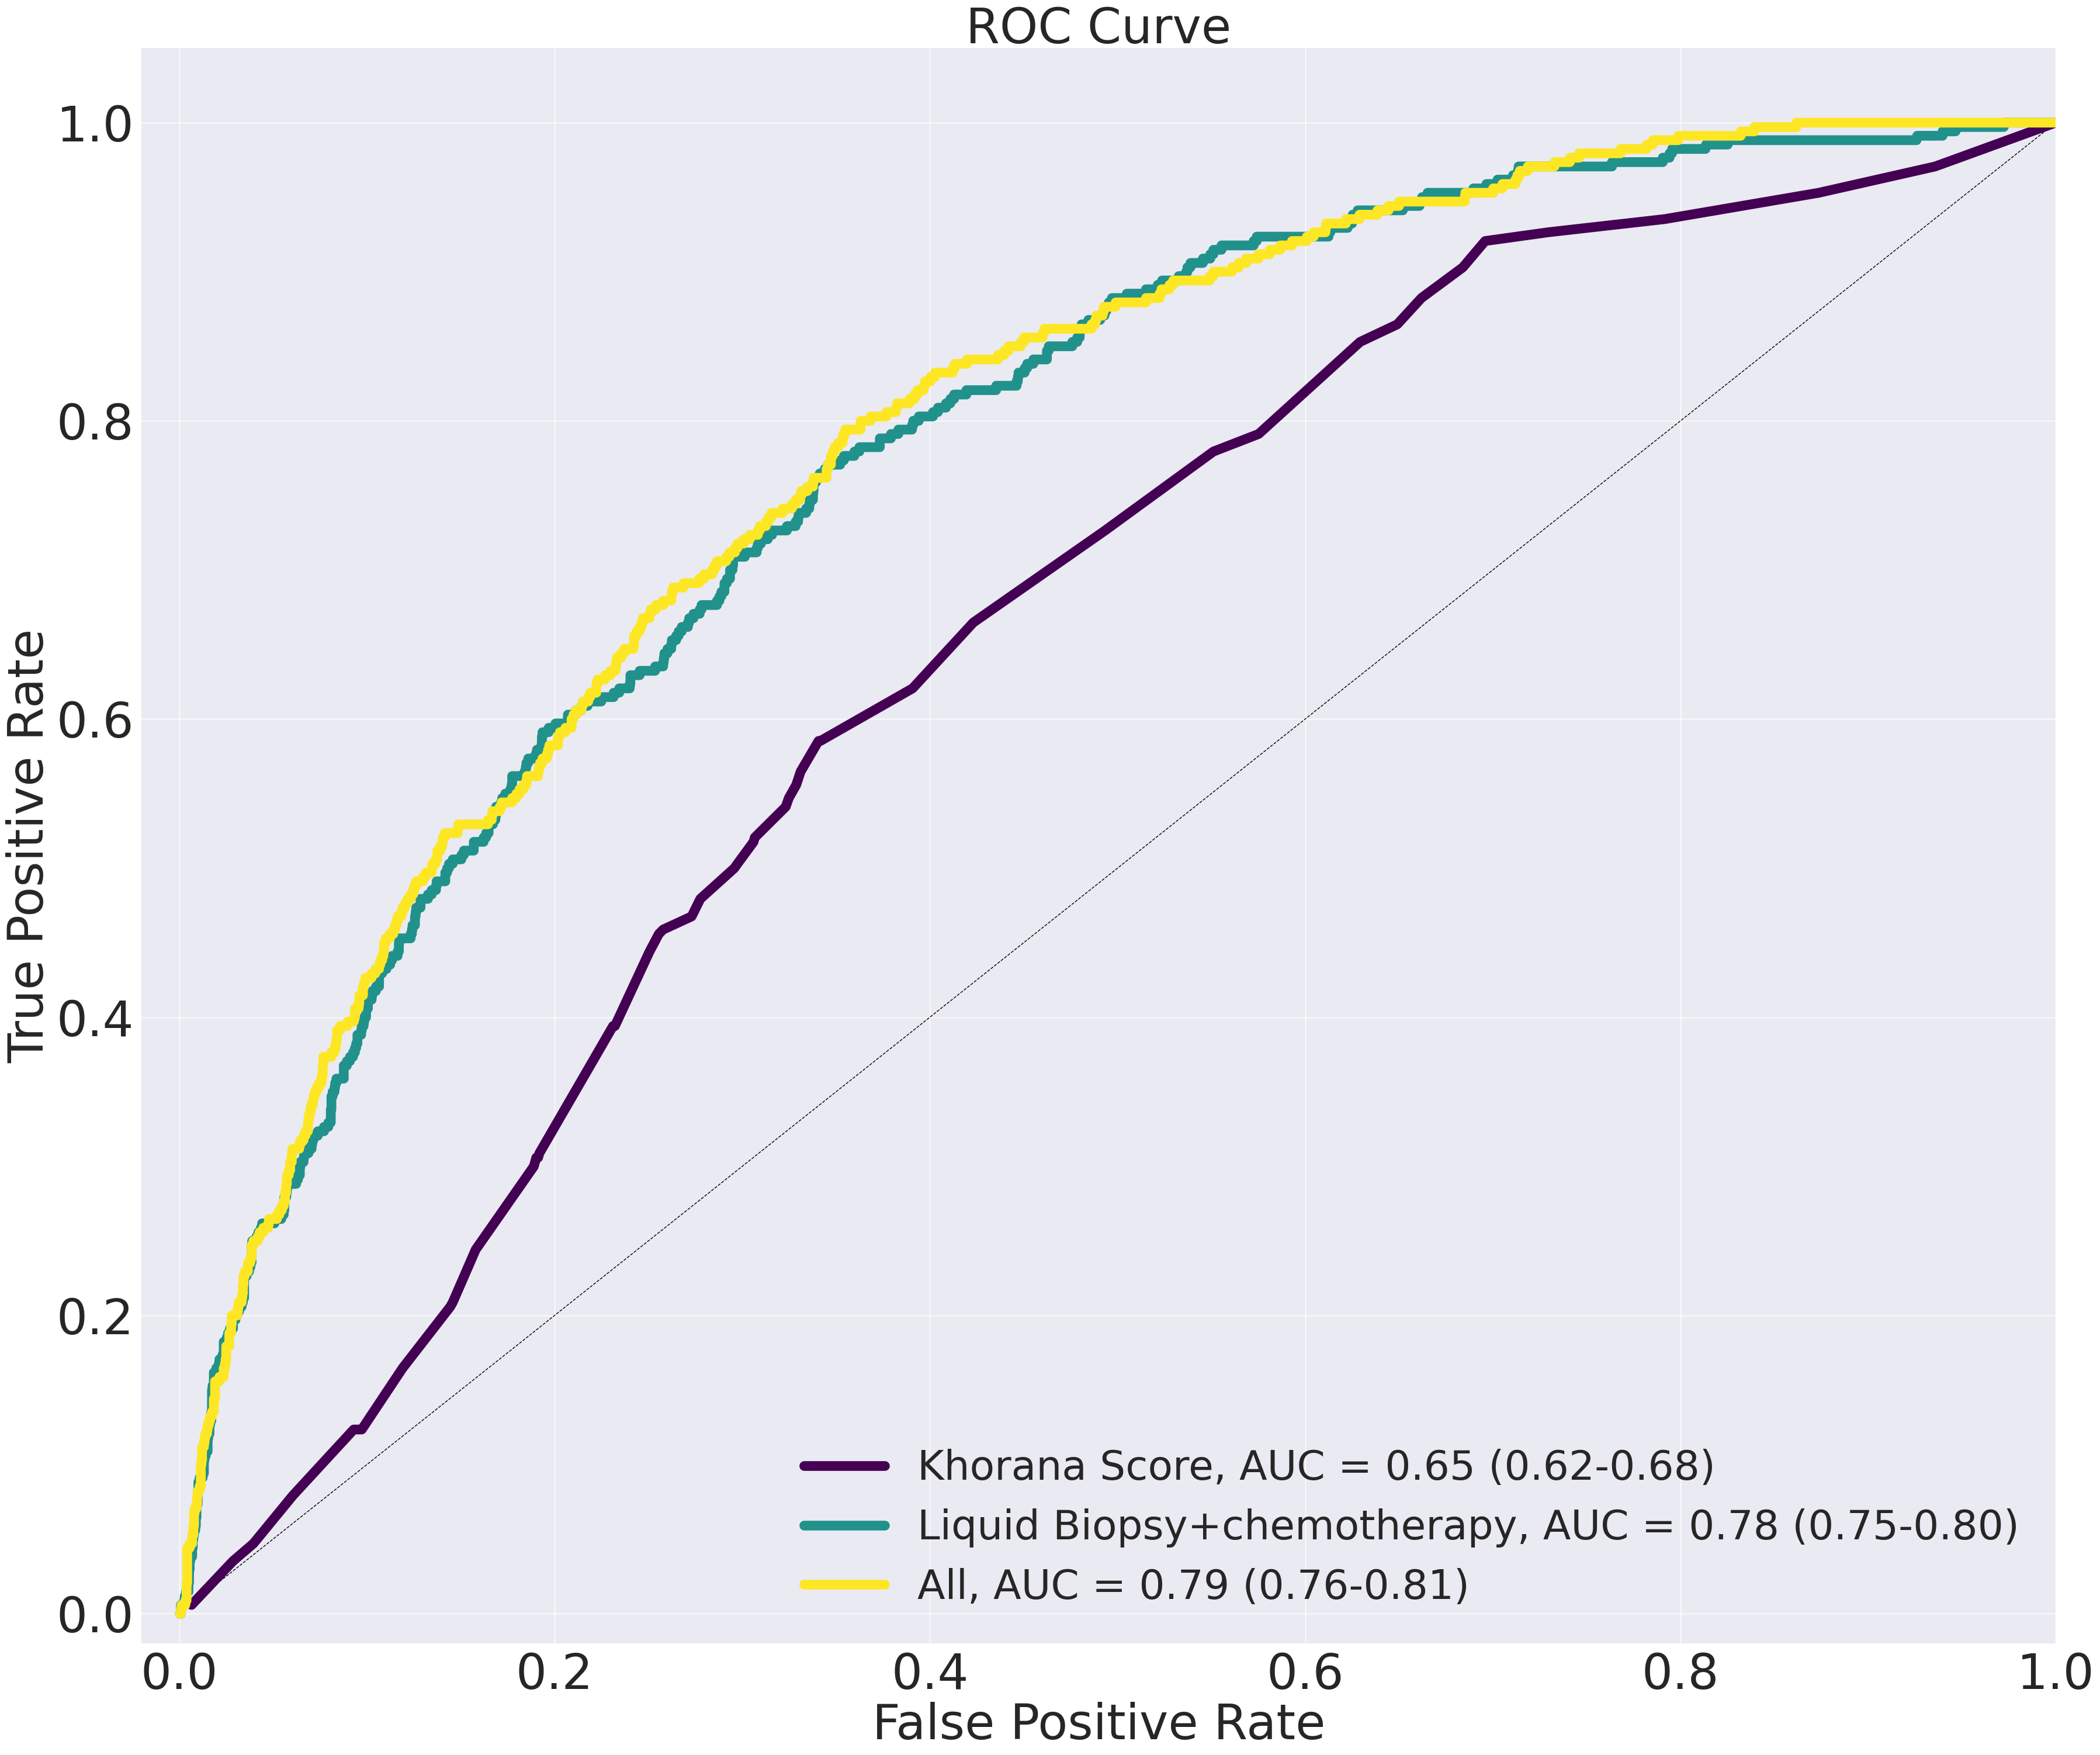

In [47]:
fig, ax = roc.plot()
plt.show()

In [49]:
print(roc.preds.keys())

odict_keys(['Khorana Score', 'Liquid Biopsy+chemotherapy', 'All'])


In [70]:
p, ci = roc.compare(np.array([
    [0, -1,  1],
]))
print(p, ci)

0.04593405083753927 [[0.00023621 0.02593192]]


In [71]:
p, ci = roc.compare(np.array([
    [-1, 0,  1],
]))
print(p, ci)

1.0203660134204128e-13 [[0.13720192 0.23537547]]


In [72]:
p, ci = roc.compare(np.array([
    [-1, 1,  0],
]))
print(p, ci)

1.289502789649867e-11 [[0.12305924 0.22335002]]


Non-Small Cell Lung Cancer,1856,inf (inf-inf),3287,inf (inf-inf)
Breast Cancer,586,inf (inf-inf),4557,inf (inf-inf)
Pancreatic Cancer,452,inf (inf-inf),4691,inf (inf-inf)
Melanoma,318,inf (inf-inf),4825,inf (inf-inf)
Prostate Cancer,238,inf (inf-inf),4905,inf (inf-inf)
Bladder Cancer,221,inf (inf-inf),4922,inf (inf-inf)
Esophagogastric Cancer,158,inf (inf-inf),4985,inf (inf-inf)
Hepatobiliary Cancer,154,inf (inf-inf),4989,inf (inf-inf)
Colorectal Cancer,138,inf (inf-inf),5005,inf (inf-inf)


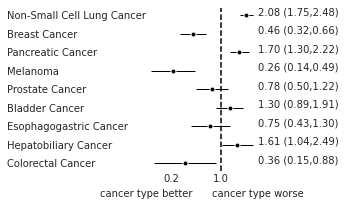

In [22]:
HRs = pd.Series()
commoncancer_set = set()
for c in common_cancers:
    specific_set = set(vte[vte['CANCER_TYPE']==c]['MRN'].unique())
    foo=(generateKMFSummary(vte[vte.stop>=0],
                            specific_set,
                            set(vte.MRN.unique())-specific_set,c))
    HRs.loc[foo[0]] = foo[1]
    commoncancer_set = commoncancer_set.union(specific_set)
    
HRs.loc[foo[0]] = foo[1]

myForest(HRs,'cancer type worse','cancer type better','figures/xs_cancertype_CAT_forest.svg',(2,3))

In [8]:
import warnings
warnings.filterwarnings('ignore')

anymut_set = set(vte[vte['+ctDNA']].PATIENT_ID.unique())
nomut_set = set(vte[~vte['+ctDNA']].PATIENT_ID.unique())

HRs = pd.Series()
commoncancer_set = set()

for c in less_common_cancers:
    vte[c] = vte.CANCER_TYPE==c

for c in common_cancers+less_common_cancers:
    
    try:
        specific_set = set(vte[vte[c]]['PATIENT_ID'].unique())
        foo=(generateKMFSummary(vte[vte.stop>=0],
                                specific_set.intersection(anymut_set),
                                specific_set.intersection(nomut_set),c,idcol='PATIENT_ID'))
        HRs.loc[foo[0]] = foo[1]
        commoncancer_set = commoncancer_set.union(specific_set)
    except:
        print(c+' singular')
    
foo=(generateKMFSummary(vte[vte.stop>=0],
                            anymut_set-commoncancer_set,
                            nomut_set-commoncancer_set,'Other',idcol='PATIENT_ID'))
HRs.loc[foo[0]] = foo[1]

Non-Small Cell Lung Cancer,1368,inf (inf-inf),488,inf (inf-inf)
Breast Cancer,422,inf (inf-inf),164,inf (inf-inf)
Pancreatic Cancer,258,inf (inf-inf),194,inf (inf-inf)
Melanoma,84,inf (inf-inf),234,inf (inf-inf)
Prostate Cancer,176,inf (34-inf),62,inf (inf-inf)
Bladder Cancer,159,inf (inf-inf),62,inf (inf-inf)
Esophagogastric Cancer,101,inf (inf-inf),57,inf (inf-inf)
Hepatobiliary Cancer,116,inf (inf-inf),38,inf (13-inf)
Colorectal Cancer,66,inf (inf-inf),72,inf (inf-inf)
Cancer of Unknown Primary,104,32 (19-32),26,inf (inf-inf)
Histiocytosis singular
Germ Cell Tumor,47,inf (inf-inf),41,inf (inf-inf)
Neoplastic Vs Reactive singular
Endometrial Cancer,23,inf (inf-inf),27,inf (inf-inf)
Small Cell Lung Cancer,39,inf (inf-inf),3,inf (inf-inf)
Soft Tissue Sarcoma,6,inf (inf-inf),23,inf (inf-inf)
Gastrointestinal Stromal Tumor,19,inf (inf-inf),11,inf (13-inf)
Other,213,inf (inf-inf),440,inf (inf-inf)


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


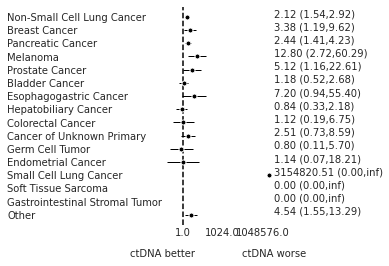

In [9]:
myForest(HRs,'ctDNA worse','ctDNA better','figures/forest_cat_cancertype_extended.svg',(2,4))

In [33]:
HRs = pd.Series()
commoncancer_set = set()
for c in common_cancers:
    specific_set = set(vte[vte[c]]['PATIENT_ID'].unique())
    
    cph = CoxPHFitter()
    cph.fit(vte[vte[c] & (vte.stop>=0)][['log10(cfDNA concentration)','dead','stop']], 'stop','dead')
    HRs.loc[c] = (cph.summary['exp(coef)'].loc['log10(cfDNA concentration)'],
                       cph.summary['exp(coef) lower 95%'].loc['log10(cfDNA concentration)'],
                       cph.summary['exp(coef) upper 95%'].loc['log10(cfDNA concentration)'])
    commoncancer_set = commoncancer_set.union(specific_set)
    
    
cph.fit(vte[vte['PATIENT_ID'].isin(commoncancer_set) & (vte.stop>=0)][['log10(cfDNA concentration)','dead','stop']], 'stop','dead')
HRs.loc['Other'] =   (cph.summary['exp(coef)'].loc['log10(cfDNA concentration)'],
                       cph.summary['exp(coef) lower 95%'].loc['log10(cfDNA concentration)'],
                       cph.summary['exp(coef) upper 95%'].loc['log10(cfDNA concentration)'])

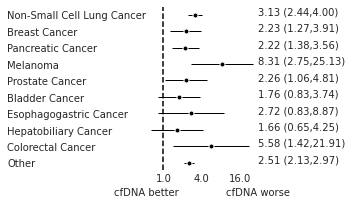

In [34]:
myForest(HRs,'cfDNA worse','cfDNA better','figures/forest_cat_cancertype_cfDNA.svg',(2,3))

In [12]:
from sklearn.model_selection import KFold
from sksurv.datasets import load_gbsg2
from sksurv.preprocessing import OneHotEncoder
from sksurv.ensemble import RandomSurvivalForest
from sklearn.inspection import permutation_importance


def featureImportances(df_train,df_test):
    X_train = df_train[allcols].fillna(0)
    X_test = df_test[allcols].fillna(0)
    y_train = df_train[['dead','stop']].apply(tuple, axis=1).values.tolist()
    y_train = np.array(y_train, dtype=[('Status', '?'), ('Survival_in_days', '<f8')])
    y_test = df_test[['dead','stop']].apply(tuple, axis=1).values.tolist()
    y_test = np.array(y_test, dtype=[('Status', '?'), ('Survival_in_days', '<f8')])

    random_state=20
    rsf = RandomSurvivalForest(n_estimators=1000,
                            min_samples_split=10,
                            min_samples_leaf=15,
                            n_jobs=-1,
                            random_state=random_state)
    rsf.fit(X_train, y_train)

    predictions = rsf.predict(X_test)

    n_repeats= 3
    result = permutation_importance(
        rsf, X_test, y_test, n_repeats=n_repeats, random_state=random_state
    )

    importances = pd.DataFrame(
        {k: result[k] for k in ("importances_mean", "importances_std",)},
        index=X_test.columns
    )
    
    importances['importances_sem'] = importances['importances_std']/np.sqrt(n_repeats)

    return (rsf, importances)#.sort_values(by="importances_mean", ascending=False).head(20)

In [13]:
xs_mutations = pd.read_csv('data/data_mutations_extended_xs_1_6_23.txt',sep='\t',comment='#')
xs_vc = xs_mutations.Hugo_Symbol.value_counts().head(40)
xs_common_genes = xs_vc[xs_vc>len(xs_vc)*0.05].index
metsitemap = pd.read_csv('metsitemap.txt')
common_cancers = ['Non-Small Cell Lung Cancer','Breast Cancer','Pancreatic Cancer','Melanoma',
          'Prostate Cancer','Bladder Cancer','Esophagogastric Cancer',
          'Hepatobiliary Cancer','Colorectal Cancer','Retinoblastoma','Cancer of Unknown Primary','Histiocytosis','Germ Cell Tumor',
          'Neoplastic Vs Reactive','Endometrial Cancer','Small Cell Lung Cancer','Soft Tissue Sarcoma','Gastrointestinal Stromal Tumor']
demographics_cols = ['AGE','MALE','WHITE', 'ASIAN-FAR EAST/INDIAN SUBCONT', 'BLACK OR AFRICAN AMERICAN']
met_cols = ['N organ sites']+list(metsitemap.SITE_GENIE.unique())
ctDNA_cols = list(xs_common_genes)+['+ctDNA','log10(max VAF)','log10(cfDNA concentration)']
ks_cols = ['KHORANA SCORE','chemotherapy']
ks_component_cols = ['BMI','Platelets','HGB','WBC','chemotherapy']+common_cancers
other_cols = ['lt_start']  #'Albumin'
#ks_ctDNA_simple_cols = ks_component_cols+['KHORANA SCORE','lt_start']+met_cols+common_cancers+['+ctDNA','log10(max VAF)','log10(cfDNA concentration)']
allcols = ks_component_cols+['KHORANA SCORE']+met_cols+ctDNA_cols+other_cols+demographics_cols

In [15]:
allcols = list(set(allcols).intersection(set(dftemp.columns)))

In [16]:
for c in common_cancers:
    vte[c] = vte.CANCER_TYPE==c
dftemp = vte[vte['stop']>=0].reset_index()

kf = KFold(n_splits=5)# Define the split - into n_splits folds 
kf.get_n_splits(dftemp) # returns the number of splitting iterations in the cross-validator

df_importances = pd.DataFrame()
for i, (train_index, test_index) in enumerate(kf.split(dftemp)):
    print(f'fold: {i}')
    train = dftemp.loc[train_index]
    test = dftemp.loc[test_index]
    (rsf, importances) = featureImportances(train,test)
    df_importances['fold_'+str(i)] = importances['importances_mean']

fold: 0
fold: 1
fold: 2
fold: 3
fold: 4


In [17]:
df_importances.to_csv('vte_df_importances.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


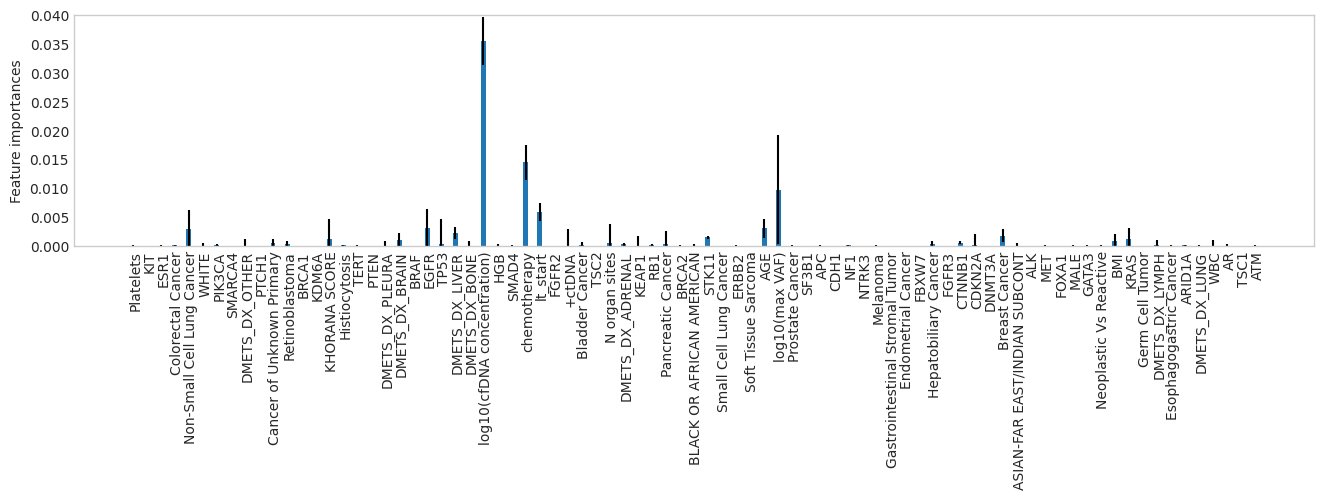

In [18]:
width = 0.35
ind = np.arange(len(allcols))

means = df_importances.mean(axis=1)
sems = df_importances.std(axis=1)/np.sqrt(5)

fig, ax = plt.subplots(figsize=(16,3))
rects1 = ax.bar(ind - width/2, means, 
                width, yerr=sems*2)
ax.set_ylabel('Feature importances')
ax.set_xticks(ind)
ax.set_xticklabels(allcols,rotation=90)
ax.grid(False)
ax.legend()
ax.set_ylim(0,0.04)

fig.savefig('figures/RSF_importances.svg',format='svg')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


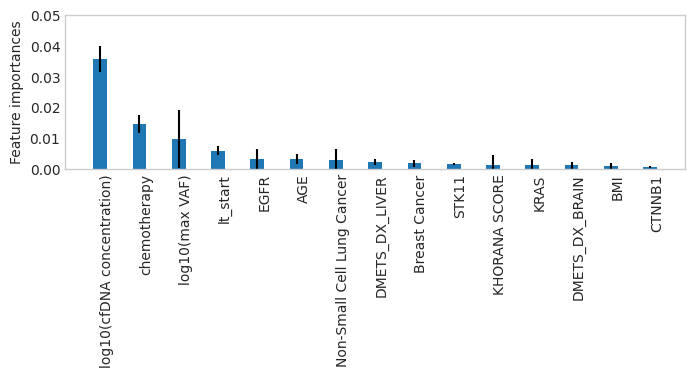

In [19]:
importances = pd.DataFrame()
importances['means'] = means
importances['sems'] = sems
importances_sorted = importances.sort_values('means',ascending=False)
importances_sorted = importances_sorted[importances_sorted.means>=0.0005]

ind = np.arange(len(importances_sorted))
fig, ax = plt.subplots(figsize=(8,2))
rects1 = ax.bar(ind - width/2, importances_sorted['means'], 
                width, yerr=importances_sorted['sems']*2)
ax.set_ylabel('Feature importances')
ax.set_xticks(ind)
ax.set_xticklabels(importances_sorted.index,rotation=90)
ax.grid(False)
ax.legend()
ax.set_ylim(0,0.05)

fig.savefig('figures/RSF_importances_sorted.svg',format='svg')